In [1]:
# Dependencies
import requests
import json
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.stats import linregress

# OpenWeatherMap API key
from config import api_key

# Import citipy for cities based on lat/long values
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

In [3]:
#Save config information
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build patrial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
# query_url


In [4]:
# Set lists to hold response info
city_data = []
cloudiness = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# Set initial counts
counter = 0
result_counter = 1

print("Beginning Data Retrieval\n------------------------------")

# Loop through data to create dataframe
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if counter > 49:
            counter = 1
            result_counter += 1
            city_data.append(city)
        else:
            counter += 1
            city_data.append(city)
        print(f"Processing Record {counter} of Set {result_counter} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")


Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | caxito
Processing Record 5 of Set 1 | negombo
Processing Record 6 of Set 1 | coihaique
Processing Record 7 of Set 1 | bengkulu
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | sao filipe
City not found. Skipping...
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | wuxue
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | limbe
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | sioux lookout
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | aasiaat
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | dongsheng
Processing Record 20 of Set 1 | nikolskoye
Processing Record 21 of Set 1 | kruisfontein
Processing Record 22 of Set 1 | fort nelson
Proc

Processing Record 36 of Set 4 | maceio
Processing Record 37 of Set 4 | seymchan
Processing Record 38 of Set 4 | vanavara
Processing Record 39 of Set 4 | peleduy
Processing Record 40 of Set 4 | belen
City not found. Skipping...
Processing Record 41 of Set 4 | little current
Processing Record 42 of Set 4 | saint-philippe
Processing Record 43 of Set 4 | teacapan
Processing Record 44 of Set 4 | bowen
Processing Record 45 of Set 4 | lagoa
Processing Record 46 of Set 4 | edd
Processing Record 47 of Set 4 | guskhara
Processing Record 48 of Set 4 | dukat
City not found. Skipping...
Processing Record 49 of Set 4 | taltal
Processing Record 50 of Set 4 | agirish
Processing Record 1 of Set 5 | kroya
Processing Record 2 of Set 5 | provideniya
Processing Record 3 of Set 5 | bulancak
Processing Record 4 of Set 5 | souillac
City not found. Skipping...
Processing Record 5 of Set 5 | zaoyang
Processing Record 6 of Set 5 | constitucion
Processing Record 7 of Set 5 | catuday
Processing Record 8 of Set 5 |

Processing Record 21 of Set 8 | severo-kurilsk
Processing Record 22 of Set 8 | tecpan
Processing Record 23 of Set 8 | fond du lac
Processing Record 24 of Set 8 | dolores
Processing Record 25 of Set 8 | sao joao da barra
Processing Record 26 of Set 8 | kingston
Processing Record 27 of Set 8 | asfi
Processing Record 28 of Set 8 | samarai
Processing Record 29 of Set 8 | luwuk
Processing Record 30 of Set 8 | alofi
City not found. Skipping...
Processing Record 31 of Set 8 | nefteyugansk
City not found. Skipping...
Processing Record 32 of Set 8 | dhidhdhoo
Processing Record 33 of Set 8 | verkhnyaya inta
Processing Record 34 of Set 8 | snyatyn
City not found. Skipping...
Processing Record 35 of Set 8 | nanortalik
Processing Record 36 of Set 8 | anshun
City not found. Skipping...
City not found. Skipping...
Processing Record 37 of Set 8 | katangli
Processing Record 38 of Set 8 | kokstad
Processing Record 39 of Set 8 | albstadt
Processing Record 40 of Set 8 | yumen
Processing Record 41 of Set 8

Processing Record 50 of Set 11 | omboue
City not found. Skipping...
Processing Record 1 of Set 12 | jalu
Processing Record 2 of Set 12 | corpus christi
Processing Record 3 of Set 12 | egvekinot
City not found. Skipping...
Processing Record 4 of Set 12 | norman
Processing Record 5 of Set 12 | ust-abakan
Processing Record 6 of Set 12 | panama city
Processing Record 7 of Set 12 | del rio
Processing Record 8 of Set 12 | penon blanco
Processing Record 9 of Set 12 | palatca
Processing Record 10 of Set 12 | shingu
Processing Record 11 of Set 12 | pithora
Processing Record 12 of Set 12 | chatellerault
------------------------------
Data Retrieval Complete
------------------------------


In [14]:
# Create dictionary of lists for DataFrame
weather_info={
    'City':city_data,
    'Lat':lats,
    'Lng':lngs,
    'Max Temp':max_temps,
    'Humidity':humidities,
    'Cloudiness':cloudiness,
    'Wind Speed':wind_speeds,
    'Country':countries,
    'Date':dates
}

In [15]:
# Get weather data into DataFrame
weather_df = pd.DataFrame(weather_info)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,25.24,76,16,5.88,PF,1612679668
1,punta arenas,8.9897,125.3400,24.55,92,100,0.51,PH,1612679669
2,ribeira grande,42.7461,-8.4439,1.00,93,40,2.57,ES,1612679670
3,caxito,-8.5785,13.6643,25.00,88,75,2.06,AO,1612679670
4,negombo,7.2083,79.8358,31.00,62,40,5.14,LK,1612679671


In [16]:
# Check count on DataFrame (must be at least 500)
weather_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [17]:
# Get all info on DataFrame
# Inspect to see if there are any humidities >100%
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,23.052222,22.001718,9.193470,72.357651,53.373665,3.757082,1.612680e+09
std,31.977753,88.672939,17.727132,20.939907,40.647029,2.626120,1.759596e+02
min,-54.800000,-179.166700,-41.670000,10.000000,0.000000,0.050000,1.612679e+09
25%,-2.897475,-52.631875,-3.045000,65.000000,4.250000,1.792500,1.612680e+09
50%,29.153900,27.424200,14.440000,78.000000,62.500000,3.090000,1.612680e+09
75%,48.431050,98.447675,24.387500,88.000000,96.000000,4.990000,1.612680e+09
max,78.218600,179.316700,35.000000,100.000000,100.000000,15.950000,1.612680e+09


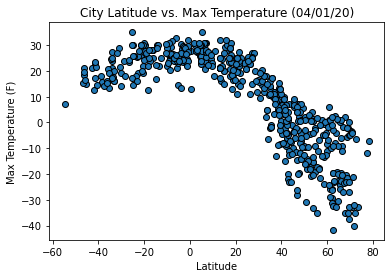

In [21]:
# Plot the data using a scatter plot
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
plt.scatter(x_values,y_values,edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (04/01/20)')
plt.show()

In [ ]:
# Set a grid on the plot
plt.grid()

# Save the figure
plt.savefig("../Images/lat_temp.png")